# Junaid Iqbal Khan
# 2021317105

In [ ]:
import math
import cv2
import random 
import matplotlib.pyplot as plt
import numpy as np


**Question#01**

MNIST

In [ ]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


from keras.utils import to_categorical
#one-hot encode target column inorder to induce classification probabilities in learning setup
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
  plt.show()




11501568/11490434 [==============================] - 0s 0us/step


ImportError: ignored

In [ ]:
X_train.shape

(60000, 28, 28)

IRIS

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']


from keras.utils import to_categorical
#one-hot encode target column inorder to induce classification probabilities in learning setup
y = to_categorical(y)


# # Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5


([], <a list of 0 Text major ticklabel objects>)

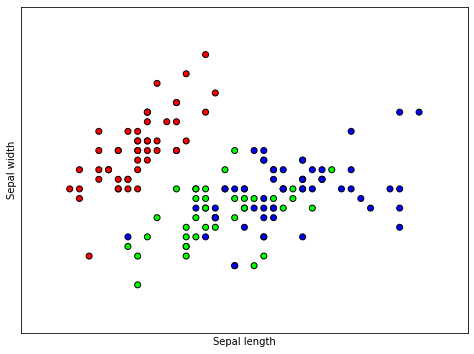

In [ ]:

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

**Question#02**

Defining SLP

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error
class SLP_sigmoidal:

  #intialization
  def __init__(self):
    self.w = None
    self.b = None

  #feedforward
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self, x):
    return 1/(1 + np.exp(-x))


  #backward
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)*x


  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
 
  #model fitting
  def fit(self, X, Y, epochs=5, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = []
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w_mse(x, y)
        db += self.grad_b_mse(x, y) 
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss.append(mean_squared_error(Y, Y_pred))
    
    if display_loss:
      plt.plot(loss)
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  #prediction action:
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

Data Preprocessing with focus on Setosa classification

In [ ]:
names = iris['target_names']
print(names)

['setosa' 'versicolor' 'virginica']


In [ ]:
y_setosa=y[:,0]
from sklearn.preprocessing import StandardScaler

# Scale data to have mean 0 and variance 1 which has merit in convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# # Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y_setosa)


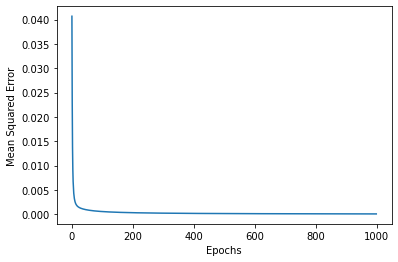

In [ ]:

#create a class object
setosa_classifier = SLP_sigmoidal()

#train the model
setosa_classifier.fit(X_train, Y_train, epochs=1000, learning_rate=0.5, display_loss=True)

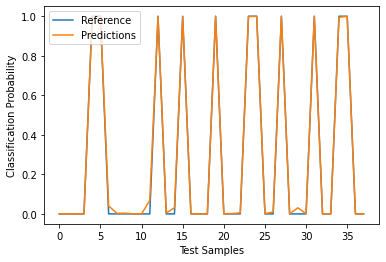

In [ ]:
Y_pred = setosa_classifier.predict(X_test)
sample=np.arange(Y_pred.shape[0])
plt.plot(sample,Y_test, label="Reference")
plt.plot(sample,Y_pred,label="Predictions")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Classification Probability')
plt.show()




**Question#03**

Data Preprocessing

In [ ]:
from keras.datasets import mnist

#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()


from keras.utils import to_categorical
#one-hot encode target column inorder to induce classification probabilities in learning setup
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


a,b,c=X_train.shape
X_train_new=np.zeros((a,b*c))
for i in range(a):
  X_train_new[i,:]=X_train[i,:,:].flatten()

A,B,C=X_test.shape
X_test_new=np.zeros((A,B*C))
for i in range(A):
  X_test_new[i,:]=X_test[i,:,:].flatten()
  



Definition of MLP

In [ ]:

from numpy import exp



def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
	e = exp(x)
	return e / e.sum()
 


class MLP_sigmoidal_softmax():
    def __init__(self, n_hidden, n_iterations=3000, learning_rate=0.01):
        self.n_hidden = n_hidden
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate

    def _initialize_weights(self, X, y):
        n_samples, n_features = X.shape
        _, n_outputs = y.shape
        # Hidden layer
        limit   = 1 / (math.sqrt(n_features)+0.01)
        self.W  = np.random.uniform(-limit, limit, (n_features, self.n_hidden))
        self.w0 = np.zeros((1, self.n_hidden))
        # Output layer
        limit   = 1 / (math.sqrt(self.n_hidden)+0.01)
        self.V  = np.random.uniform(-limit, limit, (self.n_hidden, n_outputs))
        self.v0 = np.zeros((1, n_outputs))

    def fit(self, X, y):

        self._initialize_weights(X, y)
        loss=[]
        for i in range(self.n_iterations):

## feedforward:
            # HIDDEN LAYER
            hidden_input = X.dot(self.W) + self.w0
            hidden_output = sigmoid(hidden_input)


            # OUTPUT LAYER
            output_layer_input = hidden_output.dot(self.V) + self.v0
            y_pred = softmax(output_layer_input)

#backward:
            loss.append(mean_squared_error(y,y_pred))
            # OUTPUT LAYER
            # Grad. w.r.t input of output layer
            grad_wrt_out_l_input = (y-y_pred) * y_pred * (1 - y_pred)*output_layer_input
            grad_v = hidden_output.T.dot(grad_wrt_out_l_input)
            grad_v0 = np.sum(grad_wrt_out_l_input, axis=0, keepdims=True)

            # HIDDEN LAYER
 
            
            grad_wrt_hidden_l_input = grad_wrt_out_l_input.dot(self.V.T) * sigmoid(hidden_input)
            grad_w = X.T.dot(grad_wrt_hidden_l_input)
            grad_w0 = np.sum(grad_wrt_hidden_l_input, axis=0, keepdims=True)

            #corresponding learning
            self.V  -= self.learning_rate * grad_v
            self.v0 -= self.learning_rate * grad_v0
            self.W  -= self.learning_rate * grad_w
            self.w0 -= self.learning_rate * grad_w0

        plt.plot(loss)
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.show()

#prediction action:

    def predict(self, X):
        # Forward pass:
        hidden_input = X.dot(self.W) + self.w0
        hidden_output = sigmoid(hidden_input)
        output_layer_input = hidden_output.dot(self.V) + self.v0
        y_pred = softmax(output_layer_input)
        return y_pred


Training and testing the MLP

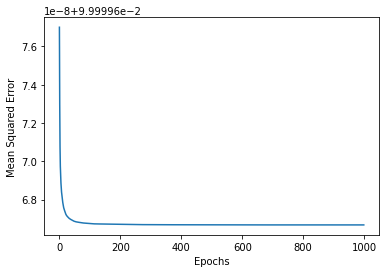

2
2


In [ ]:
model = MLP_sigmoidal_softmax(n_hidden=10,
        n_iterations=1000,
        learning_rate=0.01)

model.fit(X_train_new, y_train)
y_pred = np.argmax(model.predict(X_test_new[1]))
y_test = np.argmax(y_test[1])

print(y_pred)
print(y_test)